In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Au_nanoParticle_dataset.csv')
df.head()


,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [3]:
new_df = df[['N_total', 'N_bulk', 'N_surface', 'R_avg']]


In [4]:
new_df.head(20)


,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [5]:
# Mean
print("Mean:\n", new_df.mean())

# Standard deviation
print("\nStandard Deviation:\n", new_df.std())

# Quartiles (25%, 50%, 75%)
print("\nQuartiles:\n", new_df.quantile([0.25, 0.5, 0.75]))


Mean:
 N_total      3476.786500
N_bulk       2521.550250
N_surface     955.236250
R_avg          20.654363
dtype: float64

Standard Deviation:
 N_total      3679.286769
N_bulk       2976.232459
N_surface     721.870220
R_avg           7.610716
dtype: float64

Quartiles:
       N_total   N_bulk  N_surface      R_avg
0.25   1061.0   618.75     437.00  15.160725
0.50   1867.0  1199.00     666.00  18.629250
0.75   4503.0  3183.00    1301.75  25.525125


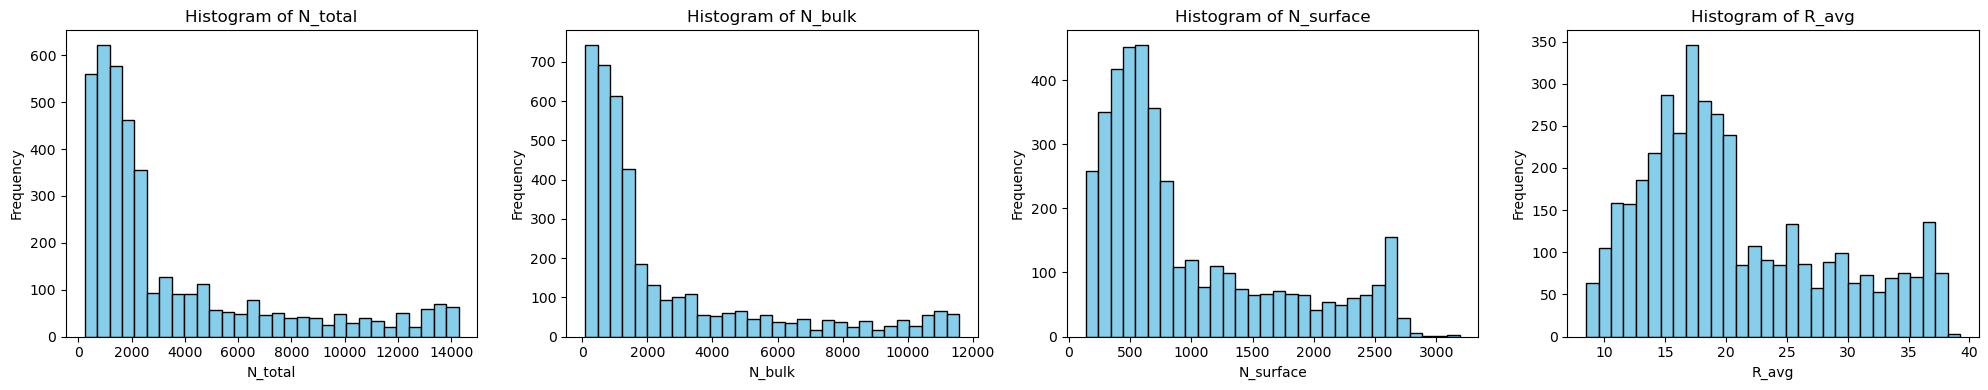

In [6]:
plt.figure(figsize=(20, 4))
features = ['N_total', 'N_bulk', 'N_surface', 'R_avg']

for i, col in enumerate(features):
    plt.subplot(1, 4, i+1)
    plt.hist(new_df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


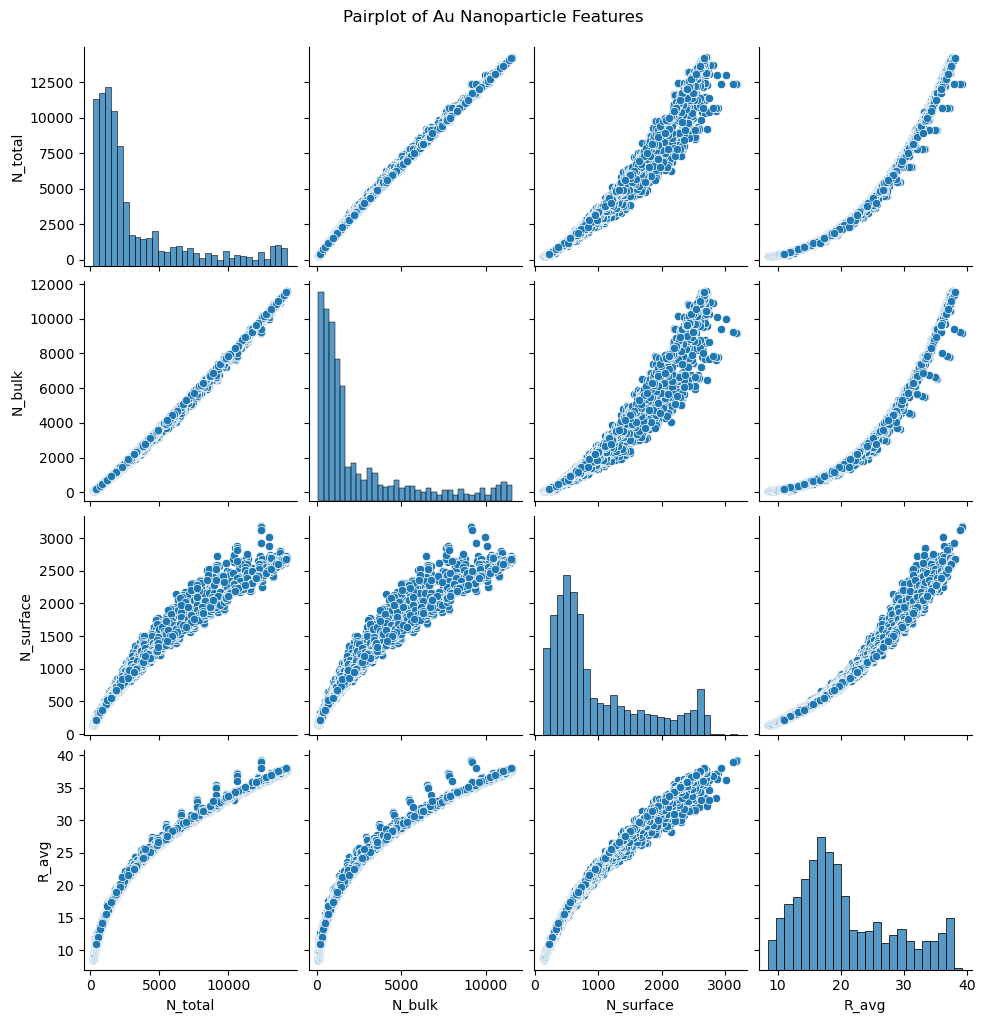

In [7]:
sns.pairplot(new_df)
plt.suptitle("Pairplot of Au Nanoparticle Features", y=1.02)
plt.show()


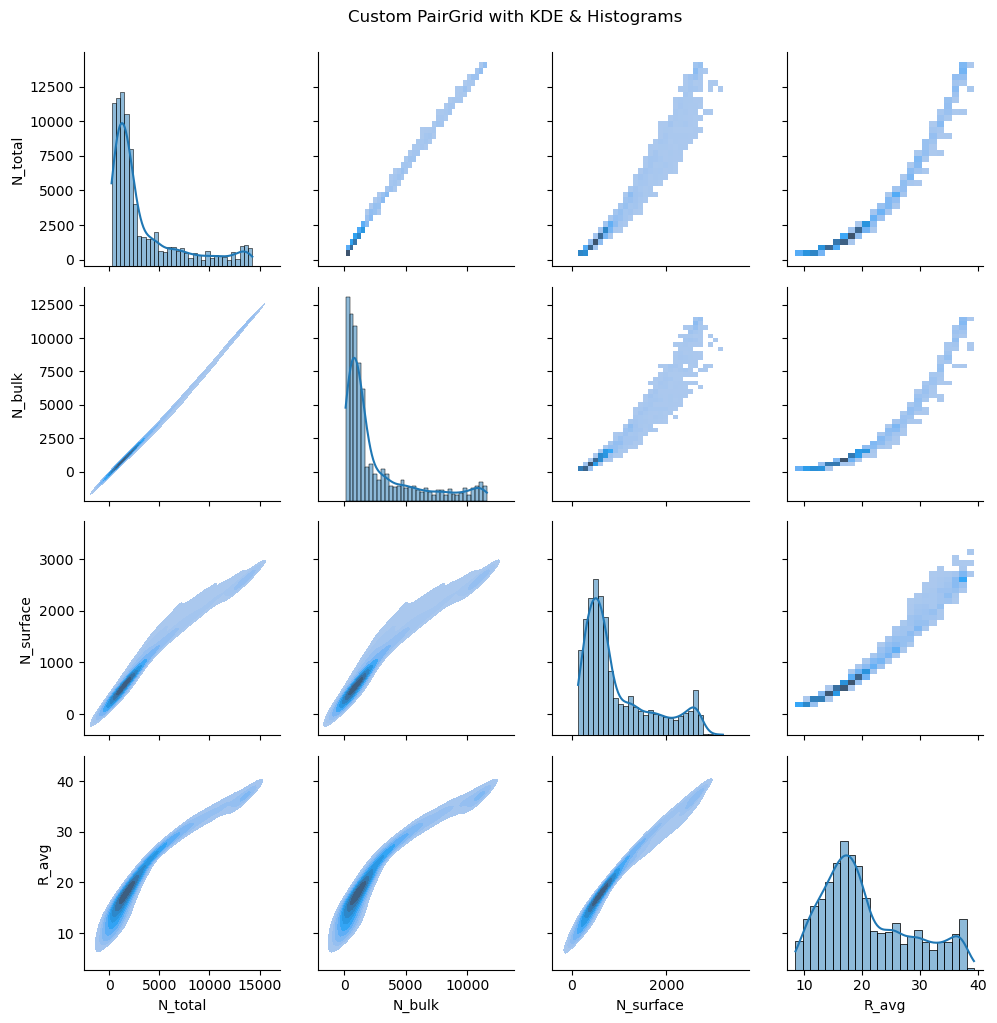

In [15]:
g = sns.PairGrid(new_df)

g.map_upper(sns.histplot)                  # upper triangle: 2D histograms
g.map_diag(sns.histplot, kde=True)         # diagonal: histogram + KDE
g.map_lower(sns.kdeplot, fill=True)        # lower triangle: KDE contour
plt.suptitle("Custom PairGrid with KDE & Histograms", y=1.02)
plt.show()
